# 프리미어리그(EPL) 분석

In [1]:
import numpy  as np
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook. 

<ipython-input-1-1b739ac237e4>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


In [2]:
# 데이터 로딩
df = pd.read_csv('results_modified.csv')
df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,K Friend,9,6,3,3,4,3,9,14,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,2020-21,2021-01-27T18:00:00Z,Chelsea,Wolves,0,0,D,0,0,D,A Madley,14,4,5,0,13,1,14,7,1,1,0,0
3231,2020-21,2021-01-27T19:30:00Z,Brighton,Fulham,0,0,D,0,0,D,C Pawson,16,10,5,3,10,0,10,14,2,1,0,0
3232,2020-21,2021-01-27T20:15:00Z,Everton,Leicester,1,1,D,1,0,H,M Dean,8,19,2,6,5,11,12,10,1,1,0,0
3233,2020-21,2021-01-27T20:15:00Z,Man United,Sheffield United,1,2,A,0,1,A,P Bankes,16,5,4,3,7,2,10,12,1,1,0,0


## 1) 역대 EPL팀 성적 분석

In [3]:
df.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

- 시즌별 골수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2012-13'),
  Text(1, 0, '2013-14'),
  Text(2, 0, '2014-15'),
  Text(3, 0, '2015-16'),
  Text(4, 0, '2016-17'),
  Text(5, 0, '2017-18'),
  Text(6, 0, '2018-19'),
  Text(7, 0, '2019-20'),
  Text(8, 0, '2020-21')])

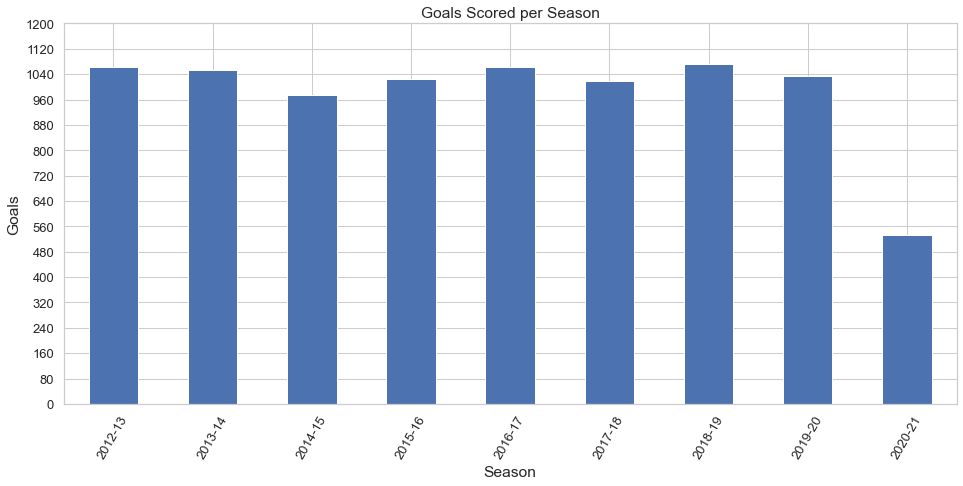

In [4]:
df['Total_Match_Goals'] = df['FTHG'] + df['FTAG']

df.groupby('Season')['Total_Match_Goals'].sum().plot(kind='bar',fontsize=13,figsize=(16,7),yticks=np.arange(0,1201,80)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)

- 시즌 별 홈팀 - 어웨이팀 골수 비교

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2012-13'),
  Text(1, 0, '2013-14'),
  Text(2, 0, '2014-15'),
  Text(3, 0, '2015-16'),
  Text(4, 0, '2016-17'),
  Text(5, 0, '2017-18'),
  Text(6, 0, '2018-19'),
  Text(7, 0, '2019-20'),
  Text(8, 0, '2020-21')])

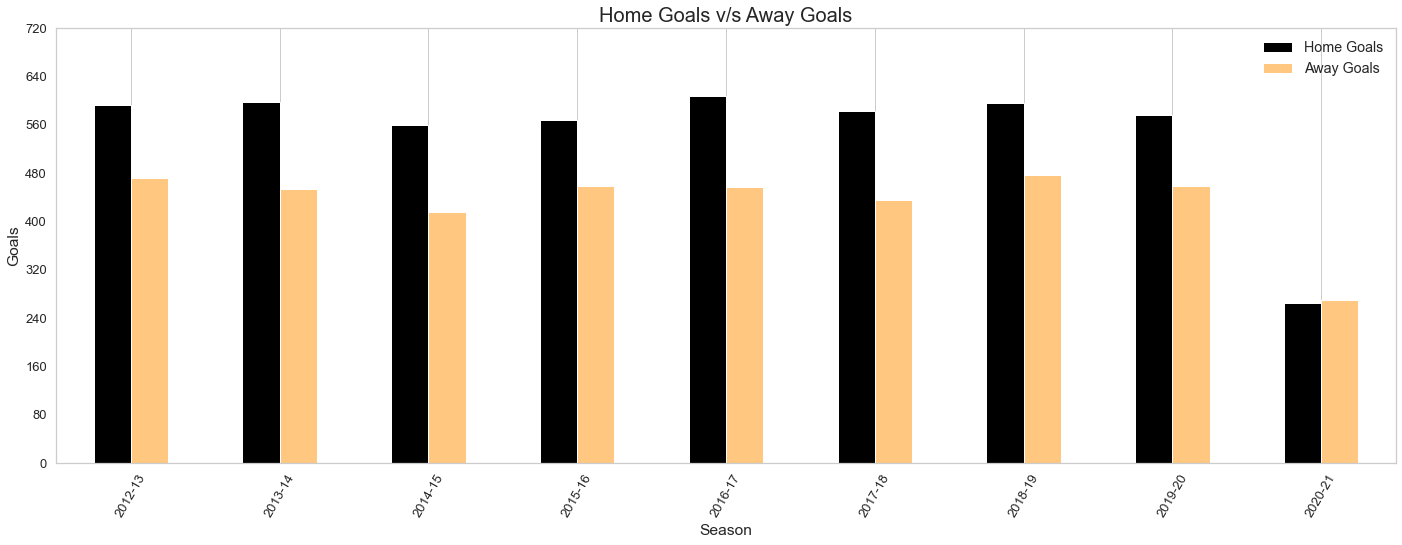

In [5]:
df.groupby('Season')[['FTHG','FTAG']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)

- 승 패 무승부 (상대값)

Text(0, 0.5, 'Frequency')

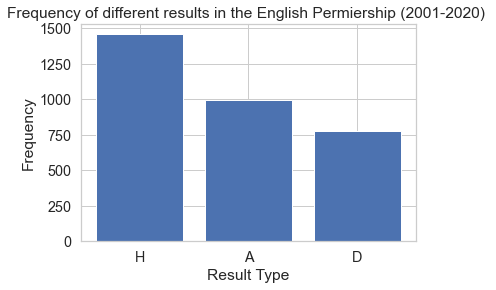

In [6]:
fig, chart = plt.subplots() 
data = df['FTR'].value_counts() 

points = data.index 
frequency = data.values 

chart.bar(points, frequency) 

chart.set_title('Frequency of different results in the English Permiership (2001-2020) ') 
chart.set_xlabel('Result Type') 
chart.set_ylabel('Frequency')

- 팀별 골 누적수

Text(0.5, 1.0, 'Total Goals by Teams')

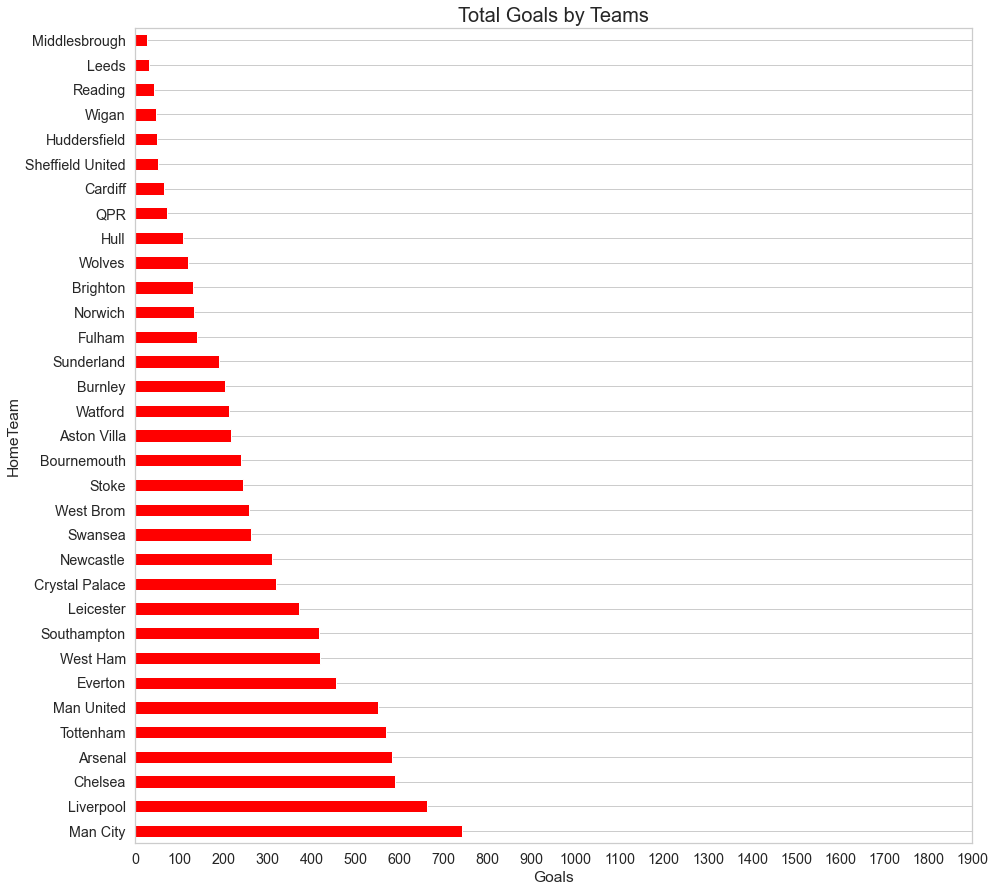

In [7]:
tot_g = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
tot_g.sort_values(ascending=False).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1901,100),color='red')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Total Goals by Teams",fontsize=20)

- 홈팀이 승리했던 확률

Text(0.5, 1.0, 'Home Ground Win %')

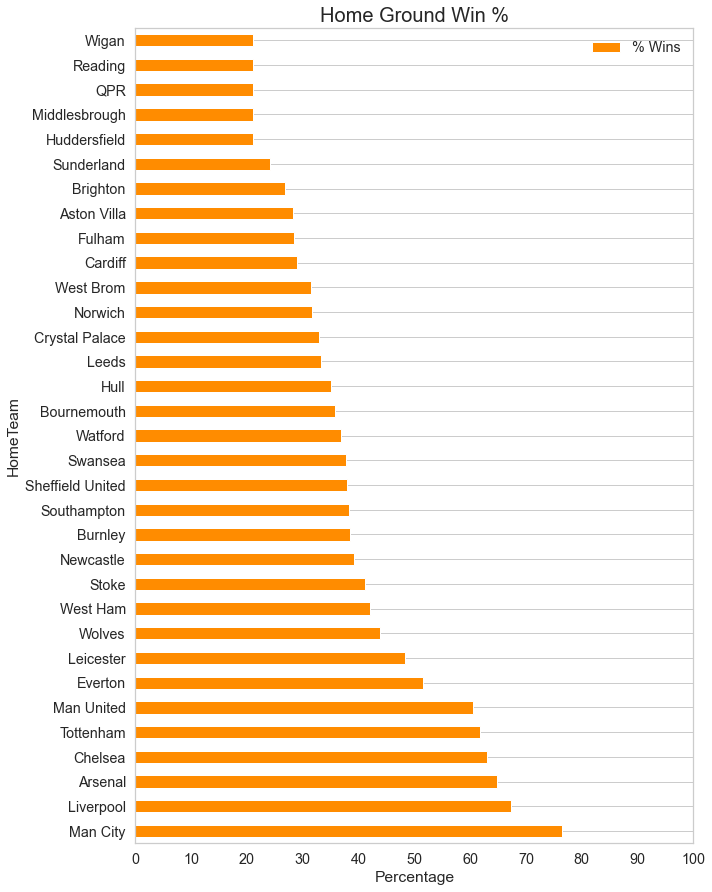

In [8]:
home_win=100*round((df.loc[df['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/df.groupby('HomeTeam')['FTR'].count()),3)
home_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Wins'])
plt.title("Home Ground Win %",fontsize=20)

- 홈팀이 패배했던 확률

Text(0.5, 1.0, 'Home Ground Loss %')

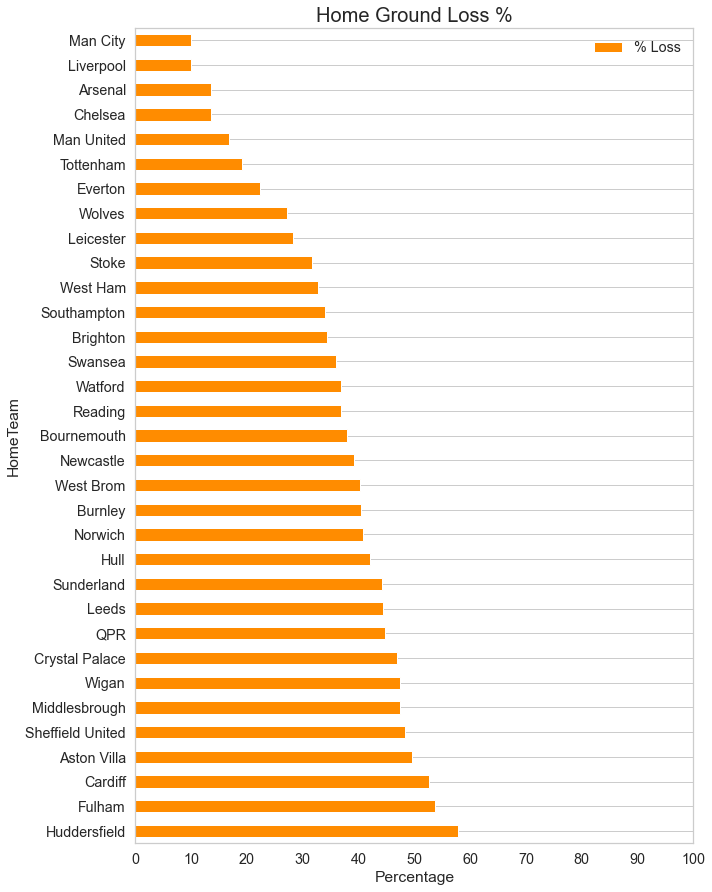

In [9]:
home_loss=100*round((df.loc[df['FTR']=='A'].groupby('HomeTeam')['FTR'].count()/df.groupby('HomeTeam')['FTR'].count()),3)
home_loss.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Loss'])
plt.title("Home Ground Loss %",fontsize=20)

- 무승부가 였던 확률

Text(0.5, 1.0, 'Home Ground Draw %')

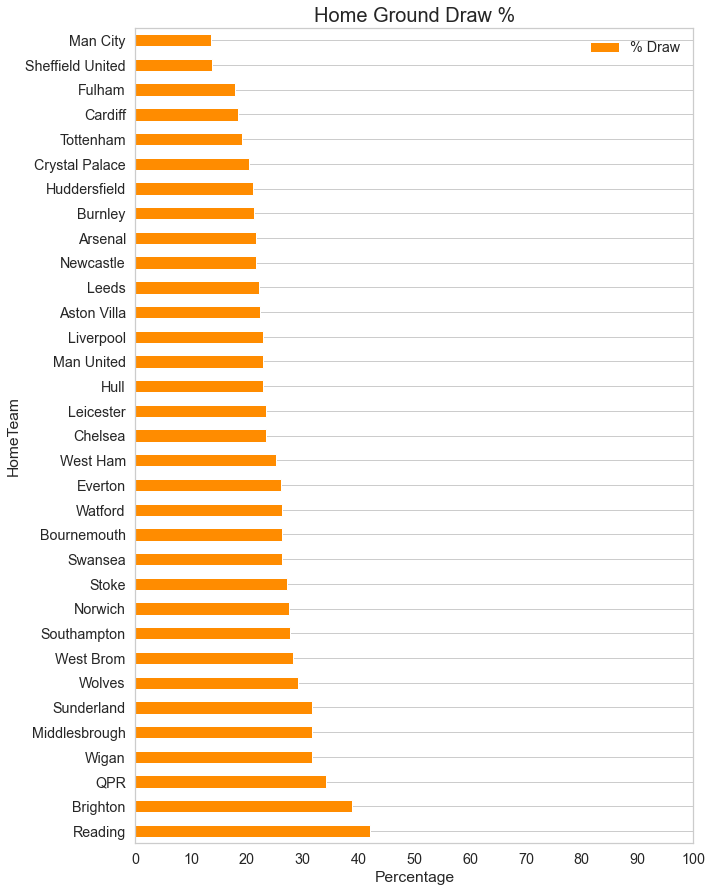

In [10]:
home_draw=100*round((df.loc[df['FTR']=='D'].groupby('HomeTeam')['FTR'].count()/df.groupby('HomeTeam')['FTR'].count()),3)
home_draw.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Draw'])
plt.title("Home Ground Draw %",fontsize=20)

## 2) 역대 시즌별 순위

- 홈팀 성적 스탯

In [11]:
#Getting total Home Games, Wins, Draws and Losses
hp = df.groupby(['Season','HomeTeam'])['FTR'].count().rename("HP")
hw = df[df['FTR'] =='H'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HW")
hl = df[df['FTR'] =='A'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HL")
hd = df[df['FTR'] =='D'].groupby(['Season','HomeTeam'])['FTR'].count().rename("HD")
home_games=pd.concat([hp,hw,hl,hd],axis=1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['HP','HL','HD','HW']]=home_games[['HP','HL','HD','HW']].astype(int)


#Getting Total Goals scored and conceded by Home Teams per Season (Full Time and Half Time)
home_score=df.groupby(['Season','HomeTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
home_score.rename(columns={'FTHG':'HG For','FTAG':'HG Against','HTAG':'HG For(Half Time)','HTHG':'HG Against(Half Time)'},inplace=True)

home_df=pd.merge(left=home_games,right=home_score,on=['Season','HomeTeam'],how='left')

- 어웨이팀 성적 스탯

In [12]:
#Getting total Away Games, Wins, Draws and Losses
ap = df.groupby(['Season','AwayTeam'])['FTR'].count().rename("AP")
aw = df[df['FTR'] =='A'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AW")
al = df[df['FTR'] =='H'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AL")
ad = df[df['FTR'] =='D'].groupby(['Season','AwayTeam'])['FTR'].count().rename("AD")
away_games=pd.concat([ap,aw,al,ad],axis=1).reset_index()
away_games.fillna(0,inplace=True)   ##NaN comes where theere are 0 games as groupby misses that entry
away_games[['AP','AL','AD','AW']]=away_games[['AP','AL','AD','AW']].astype(int)


#Getting Total Goals scored and conceded by Away Teams per Season (Full Time and Half Time)
away_score=df.groupby(['Season','AwayTeam'])['FTAG','FTHG','HTAG','HTHG'].sum().astype(int).reset_index()
away_score.rename(columns={'FTHG':'AG Against','FTAG':'AG For','HTAG':'AG For(Half Time)','HTHG':'AG Against(Half Time)'},inplace=True)

away_df=pd.merge(left=away_games,right=away_score,on=['Season','AwayTeam'],how='left')

In [13]:
##Final Points Table (Home and Away)

pt_table = pd.merge(left=home_df,right=away_df,left_on=['Season','HomeTeam'],right_on=['Season','AwayTeam']).drop(['AwayTeam'],axis=1)
pt_table.rename(columns={'HomeTeam':'Team'},inplace=True)
pt_table['Total Played'] = pt_table['HP'] + pt_table['AP']
pt_table['Total Wins'] = pt_table['HW'] + pt_table['AW']
pt_table['Total Loss'] = pt_table['HL'] + pt_table['AL']
pt_table['Total Draw'] = pt_table['HD'] + pt_table['AD']
pt_table['GF'] = pt_table['HG For'] + pt_table['AG For']
pt_table['GA'] = pt_table['HG Against'] + pt_table['AG Against']
pt_table['GD'] = pt_table['GF'] - pt_table['GA']
pt_table['Total_Points'] = 3*pt_table['Total Wins'] + pt_table['Total Draw']  ## 3 Points for a Win and 1 Point for a Draw.


## Ranking the teams
pt_table['Rank']= pt_table.groupby('Season')['Total_Points'].rank(method='min',ascending=False)
pt_table['fin'] = pt_table.groupby(['Season','Rank'])['GD'].rank(method='first',ascending=False)  ## If points are same, use goal difference
pt_table['Rank']=np.where((pt_table['fin'] > 1),(pt_table['Rank']+pt_table['fin'] - 1),pt_table['Rank'])
pt_table.drop('fin',axis=1,inplace=True)

- 19-20 시즌 최종 성적

In [14]:
df3 = pt_table[pt_table['Season']=='2019-20'].sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]
df3

,Season,Team,Total Played,Total Wins,Total Loss,Total Draw,GF,GA,GD,Total_Points,Rank
149,2019-20,Liverpool,38,32,3,3,85,33,52,99,1.0
150,2019-20,Man City,38,26,9,3,102,35,67,81,2.0
151,2019-20,Man United,38,18,8,12,66,36,30,66,3.0
145,2019-20,Chelsea,38,20,12,6,69,54,15,66,4.0
148,2019-20,Leicester,38,18,12,8,67,41,26,62,5.0
156,2019-20,Tottenham,38,16,11,11,61,47,14,59,6.0
159,2019-20,Wolves,38,15,9,14,51,40,11,59,7.0
140,2019-20,Arsenal,38,14,10,14,56,48,8,56,8.0
154,2019-20,Sheffield United,38,14,12,12,39,39,0,54,9.0
144,2019-20,Burnley,38,15,14,9,43,50,-7,54,10.0


- 역대 우승팀

[Text(0, 0, '2012-13'),
 Text(1, 0, '2013-14'),
 Text(2, 0, '2014-15'),
 Text(3, 0, '2015-16'),
 Text(4, 0, '2016-17'),
 Text(5, 0, '2017-18'),
 Text(6, 0, '2018-19'),
 Text(7, 0, '2019-20'),
 Text(8, 0, '2020-21')]

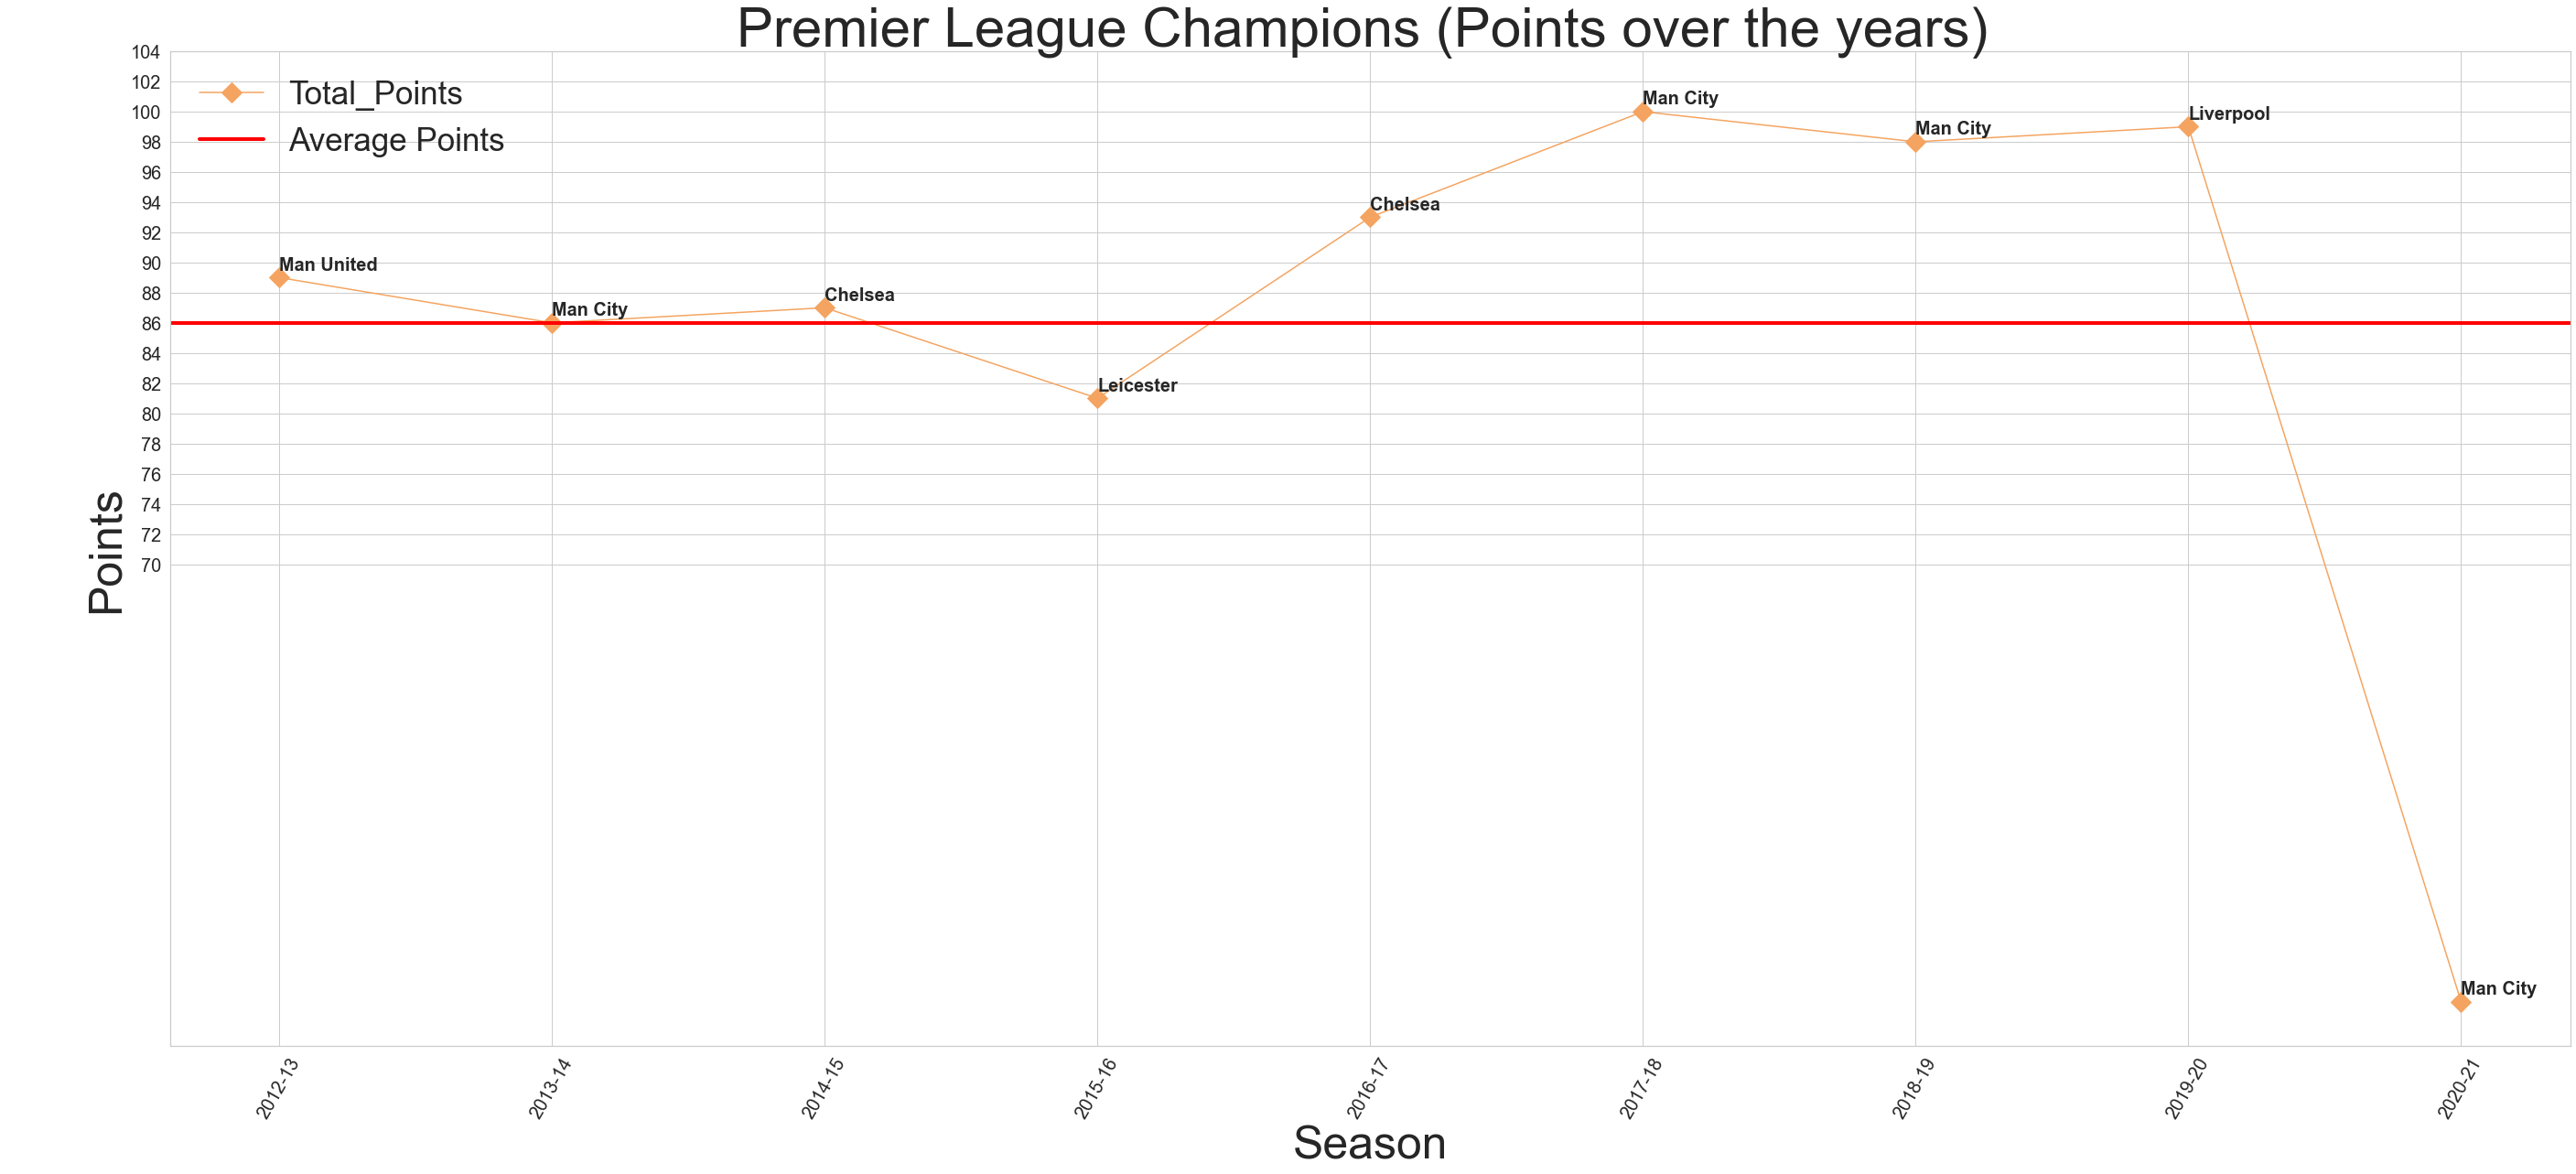

In [15]:
top = pt_table[(pt_table['Rank']==1)]
top.set_index('Season',drop=True,inplace=True)
top = top.reset_index() ##set and reset done becuase otherwise it was showing irregular spaces in x axis of the plot

## Runner Up Team Data for every Season to see trending
rup = pt_table[(pt_table['Rank']==2)]
rup.set_index('Season',drop=True,inplace=True)
rup = rup.reset_index() ##set and reset done becuase otherwise it was showing irregular spaces in x axis of the plot

top.reset_index(inplace=True)
rup.reset_index(inplace=True)

ax = top.plot(kind='line',color='sandybrown',y='Total_Points',grid=True,figsize=(47,20),label='Total_Points',linestyle='-',marker='D',markevery=1,markersize=15, fillstyle='full',markerfacecolor='sandybrown')
plt.axhline(y=top['Total_Points'].mean(),color='red',label='Average Points',linewidth=4)
plt.yticks(np.arange(70,105,2),fontsize=20)
plt.annotate('Avg Points',(-1,top['Total_Points'].mean() + 0.5),fontsize = 40,fontweight='bold')
a=0
for index,row in top.iterrows():
    b=row.Total_Points
    plt.annotate(row.Team,(a,b+.5),fontsize=20,fontweight='bold')
    a=a+1
plt.xlabel('Season',fontsize=50)
plt.ylabel('Points',fontsize=50)
plt.title('Premier League Champions (Points over the years) ',fontsize=60)
plt.legend(loc=2,fontsize=35)
plt.xticks(top.index,rotation=60,fontsize=20)
ax.set_xticklabels(top['Season'])

## 3) 더미변수와 상호작용((x = 'ST(유효슈팅)', y = 'FTG(골수), 더미변수=FTR(경기결과)'

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
df.head(4)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0,5
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0,3
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0,5


In [18]:
df.tail(4)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals
3231,2020-21,2021-01-27T19:30:00Z,Brighton,Fulham,0,0,D,0,0,D,C Pawson,16,10,5,3,10,0,10,14,2,1,0,0,0
3232,2020-21,2021-01-27T20:15:00Z,Everton,Leicester,1,1,D,1,0,H,M Dean,8,19,2,6,5,11,12,10,1,1,0,0,2
3233,2020-21,2021-01-27T20:15:00Z,Man United,Sheffield United,1,2,A,0,1,A,P Bankes,16,5,4,3,7,2,10,12,1,1,0,0,3
3234,2020-21,2021-01-28T20:00:00Z,Tottenham,Liverpool,1,3,A,0,1,A,M Atkinson,3,14,2,7,1,2,9,11,1,2,0,0,4


In [19]:
df['FTR']

0       D
1       H
2       H
3       A
4       D
       ..
3230    D
3231    D
3232    D
3233    A
3234    A
Name: FTR, Length: 3235, dtype: object

In [20]:
# 레이블 인코딩(Label Encoding)
# 홈팀승리 -> 2, 어웨이팀 승리->1, 무승부->0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['FTR']) # 와꾸 맞추기
labels = encoder.transform(df['FTR']) # 변형
print('인코딩 변환값:',labels)

인코딩 변환값: [1 2 2 ... 1 0 0]


In [21]:
# 새로운 컬럼(골수 = 홈팀골수 + 어웨이팀골수, 유효슈팅 = 홈팀유효슈팅 + 어웨이팀유효슈팅)
df['ST'] = df['HST'] + df['AST'] # 골수
df['FTG'] = df['FTHG'] + df['FTAG'] # 유효슈팅

In [22]:
df.head(6)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals,ST,FTG
0,2012-13,2012-08-18T00:00:00Z,Arsenal,Sunderland,0,0,D,0,0,D,C Foy,14,3,4,2,7,0,12,8,0,0,0,0,0,6,0
1,2012-13,2012-08-18T00:00:00Z,Fulham,Norwich,5,0,H,2,0,H,M Oliver,11,4,9,2,6,3,12,11,0,0,0,0,5,11,5
2,2012-13,2012-08-18T00:00:00Z,Newcastle,Tottenham,2,1,H,0,0,D,M Atkinson,6,12,4,6,3,5,12,8,2,2,0,0,3,10,3
3,2012-13,2012-08-18T00:00:00Z,QPR,Swansea,0,5,A,0,1,A,L Probert,20,12,11,8,5,3,11,14,2,2,0,0,5,19,5
4,2012-13,2012-08-18T00:00:00Z,Reading,Stoke,1,1,D,0,1,A,K Friend,9,6,3,3,4,3,9,14,2,4,0,1,2,6,2
5,2012-13,2012-08-18T00:00:00Z,West Brom,Liverpool,3,0,H,1,0,H,P Dowd,15,14,10,7,7,3,10,11,1,4,0,1,3,17,3


In [23]:
# 'FTR'변수를 더미 변수를 변환
FTR_dummy = pd.get_dummies(df.FTR, drop_first=True, prefix='FTR')
X = df[['ST']].join(FTR_dummy) # 유효 슈팅
Y = df[['FTG']] # 골수

In [24]:
# 상호작용
X['ST x FTR'] = X['ST']*labels
X.head(5)

,ST,FTR_D,FTR_H,ST x FTR
0,6,1,0,6
1,11,0,1,22
2,10,0,1,20
3,19,0,0,0
4,6,1,0,6


In [25]:
# 선형회귀.
lm = LinearRegression()
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

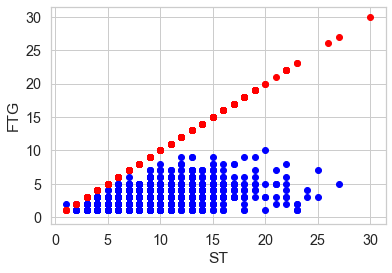

In [26]:
# 시각화.
# 회귀선을 승부결과로 구별할 수 있다.
df_HOME = df[df.FTR=='H']
df_AWAY = df[df.FTR=='A']
plt.scatter(x=df_HOME.ST, y=df_HOME.FTG, color='blue')
plt.scatter(x=df_AWAY.ST, y=df_AWAY.ST, color='red')
x_grid = np.linspace(10,5,1)
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('ST') # 유효슈팅
plt.ylabel('FTG') # 골수 
plt.show()

## 4) 홈팀 선형회귀 모델링과 분석

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
%matplotlib inline

In [28]:
# 데이터 로딩
df2 = pd.read_csv('HomeTEAM_results.csv')
df2

,FTHG,HTHG,HTAG,HTR,HS,HST,HC,HF,HY,HR
0,5,2,0,H,11,9,6,12,0,0
1,2,0,0,D,6,4,3,12,2,0
2,0,0,1,A,20,11,5,11,2,0
3,1,0,1,A,9,3,4,9,2,0
4,3,1,0,H,15,10,7,10,1,0
...,...,...,...,...,...,...,...,...,...,...
3229,0,0,0,D,14,5,13,14,1,0
3230,0,0,0,D,16,5,10,10,2,0
3231,1,1,0,H,8,2,5,12,1,0
3232,1,0,1,A,16,4,7,10,1,0


In [29]:
# 기술통계 요약.
df2.describe()

,FTHG,HTHG,HTAG,HS,HST,HC,HF,HY,HR
count,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000,3234.000000
mean,1.528139,0.681509,0.537106,14.040507,5.100186,5.892393,10.550093,1.522882,0.056277
std,1.303821,0.846374,0.751130,5.634383,2.979959,3.113213,3.393120,1.213493,0.239701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,10.000000,3.000000,4.000000,8.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,13.000000,5.000000,6.000000,10.000000,1.000000,0.000000
75%,2.000000,1.000000,1.000000,17.000000,7.000000,8.000000,13.000000,2.000000,0.000000
max,8.000000,5.000000,5.000000,43.000000,20.000000,19.000000,24.000000,7.000000,2.000000


- 상관계수

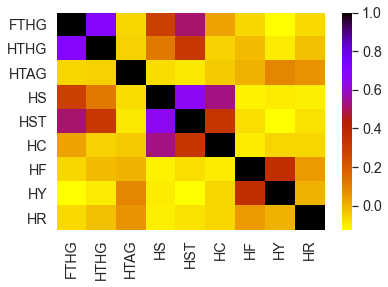

In [30]:
# 상관계수 행렬 시각화.
sns.heatmap(df2.corr(),cmap='gnuplot_r')
plt.show()

- FTHG(홈팀골수 ) - HST(홈팀 유효슈팅) 산점도 출력

In [31]:
df_two = pd.read_csv(r'HomeTEAM_results_two.csv', header='infer')
df_two

,Goals,Effective_shooting
0,5,9
1,2,4
2,0,11
3,1,3
4,3,10
...,...,...
3229,0,5
3230,0,5
3231,1,2
3232,1,4


In [32]:
#Cross Table (분할표)로 자료를 정리해 본다.
myTable = pd.crosstab(df_two.Goals,df_two.Effective_shooting)
myTable

Effective_shooting,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Goals,,,,,,,,,,,,,,,,,,,,,
0,50,128,148,133,115,73,44,22,18,9,6,11,2,1,4,0,0,0,0,0,0
1,4,61,164,211,184,143,95,61,38,26,13,10,4,7,0,2,1,1,1,2,1
2,1,8,43,96,124,150,127,85,54,31,31,17,7,7,6,0,2,0,0,0,0
3,0,0,0,24,44,53,77,61,45,33,19,11,14,6,3,1,3,0,0,0,1
4,0,0,0,0,10,21,27,31,21,17,13,14,11,3,2,0,0,1,0,0,0
5,0,0,0,0,0,4,3,12,9,8,10,4,7,0,0,1,0,1,1,0,0
6,0,0,0,0,0,0,1,1,2,2,3,4,1,1,2,1,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0


In [33]:
# 분할표를 산점도로 시각화 하기 위한 준비. 
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
Effective_shooting = list(myTable.columns)
Goals = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in Goals for y in Effective_shooting]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

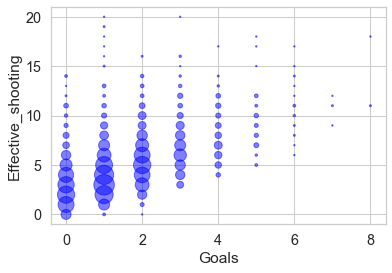

In [34]:
# 산점도 출력.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Goals')
plt.ylabel('Effective_shooting')
plt.show()
# 중복된 정보를 점의 크기로 표현

- 모델진단

 - FTHG = 풀 타임 홈 팀 골수
 - HTHG = 하프 타임 홈 팀 골수
 - HS = 홈 팀 샷
 - HST = 홈 팀 목표물
 - HC = 홈 팀 코너
 - HF = 홈팀 파울
 - HY = 홈 팀 옐로우 카드
 - HR = 홈 팀 레드 카드

In [67]:
# 해당 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
# 데이터 로딩
df_FTHG = pd.read_csv('HomeTEAM_DATA.csv')
df_FTHG

,HTHG,HS,HST,HC,HF,HY,HR,FTHG
0,2,11,9,6,12,0,0,5
1,0,6,4,3,12,2,0,2
2,0,20,11,5,11,2,0,0
3,0,9,3,4,9,2,0,1
4,1,15,10,7,10,1,0,3
...,...,...,...,...,...,...,...,...
3229,0,14,5,13,14,1,0,0
3230,0,16,5,10,10,2,0,0
3231,1,8,2,5,12,1,0,1
3232,0,16,4,7,10,1,0,1


In [68]:
# 결측치 확인
pd.isnull(df_FTHG).sum()

HTHG    0
HS      0
HST     0
HC      0
HF      0
HY      0
HR      0
FTHG    0
dtype: int64

In [69]:
# 데이터프레임을 설명변수와 반응변수로 분리
df_X = df_FTHG.loc[:,['HTHG','HS','HST','HC','HF','HY','HR']]
df_X

,HTHG,HS,HST,HC,HF,HY,HR
0,2,11,9,6,12,0,0
1,0,6,4,3,12,2,0
2,0,20,11,5,11,2,0
3,0,9,3,4,9,2,0
4,1,15,10,7,10,1,0
...,...,...,...,...,...,...,...
3229,0,14,5,13,14,1,0
3230,0,16,5,10,10,2,0
3231,1,8,2,5,12,1,0
3232,0,16,4,7,10,1,0


In [70]:
# 데이터프레임을 설명변수와 반응변수로 분리
df_Y = df_FTHG.loc[:,['FTHG']]
df_Y

,FTHG
0,5
1,2
2,0
3,1
4,3
...,...
3229,0
3230,0
3231,1
3232,1


In [71]:
# 데이터 프레임 -> 리스트 형태 변환
list_x = df_X.values.tolist()
list_x = np.array(list_x)

# 데이터 프레임 -> 리스트 형태 변환
list_y = df_Y.values.tolist()
list_y = np.array(list_y)

# 설명변수 (X값)
X = list_x # 홈팀 경기 Stats

# 반응변수 (Y값)
Y = list_y # 홈팀 골수

In [72]:
# 데이터를 Training과 Testing 용으로 쪼갠다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1940, 7)
(1294, 7)
(1940, 1)
(1294, 1)


In [74]:
# 학습과 예측.
LR = LogisticRegression(solver='liblinear',max_iter=200)
LR.fit(X_train,Y_train)
Y_pred_test = LR.predict(X_test)                            # Out-of-sample prediction. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

myModel = smf.ols(formula = "FTHG ~ HTHG + HS + HST + HC + HF + HY + HR ", data=df_FTHG)
result = myModel.fit()
result.summary()

In [49]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

myModel1 = smf.ols(formula = "FTHG ~ HTHG + HTAG + HTR + HS + HST + HC + HF + HY + HR", data=df2)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FTHG   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     437.4
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:20:41   Log-Likelihood:                -4059.8
No. Observations:                3234   AIC:                             8142.
Df Residuals:                    3223   BIC:                             8208.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4451      0.088      5.052      0.000       0.272       0.618
HTR[T.D]      -0.0718      0.059     -1.208      0.227      -0.188       0.045
HTR[T.H]      -0.0532      0.092     -0.577      0.564      -0.234       0.128
HTHG           0.8884      0.033     26.868      0.000       0.824       0.953
HTAG          -0.0163      0.036     -0.456      0.649      -0.086       0.054
HS             0.0088      0.004      2.215      0.027       0.001       0.017
HST            0.1407      0.007     19.883      0.000       0.127       0.155
HC            -0.0287      0.006     -4.994      0.000      -0.040      -0.017
HF            -0.0083      0.005     -1.748      0.081      -0.018       0.001
HY            -0.0265      0.013     -1.980      0.048      -0.053      -0.000
HR            -0.1652      0.063     -2.625      0.009      -0.289      -0.042
==============================================================================
Omnibus:                      327.788   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.406
Skew:                           0.784   Prob(JB):                    1.94e-102
Kurtosis:                       4.010   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 홈팀 파울, 레드카드 , 옐로우 카드 갯수 빼고 다시 출력

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

myModel2 = smf.ols(formula = "FTHG ~ HTHG + HS + HST + HC ", data=df_FTHG)
result2 = myModel2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FTHG   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1084.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:29:56   Log-Likelihood:                -4069.8
No. Observations:                3234   AIC:                             8150.
Df Residuals:                    3229   BIC:                             8180.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2267      0.042      5.337      0.000       0.143       0.310
HTHG           0.8865      0.019     46.548      0.000       0.849       0.924
HS             0.0099      0.004      2.503      0.012       0.002       0.018
HST            0.1418      0.007     20.064      0.000       0.128       0.156
HC            -0.0279      0.006     -4.854      0.000      -0.039      -0.017
==============================================================================
Omnibus:                      330.850   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.481
Skew:                           0.790   Prob(JB):                    2.52e-103
Kurtosis:                       4.005   Cond. No.                         49.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- VIF(다중 공산성 '심각성' 가 0보다 보다 크면 심각하다고 판단되는데 해당 모형은 단순화가 다소 필요한것으 확인된다)

In [79]:
myDict = {"변수":[], "VIF":[]}
for i, feature in enumerate(myModel2.exog_names):
    if feature != "Intercept":
        myDict["변수"] += [feature]
        myDict["VIF"] += [variance_inflation_factor(myModel1.exog, i)]
pd.DataFrame(myDict)

,변수,VIF
0,HTHG,3.821643
1,HS,8.561635
2,HST,3.499865
3,HC,3.220439


## 5) KNN 알고리즘을 활용한 분류예측

In [51]:
# 데이터 로딩
dataset=pd.read_csv('epl2020.csv')
dataset.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

In [52]:
features=['h_a','xG','xGA','npxG','npxGA','deep','deep_allowed','scored','missed','xpts','result']
dataset=dataset[features]
dataset.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result
0,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,w
1,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,l
2,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,w
3,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,l
4,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,d


- KNN(인접한 K개의 데이터로 부터 majority voting 시행) 

하이퍼파라미터 = 1,5개로 설정

In [53]:
# Feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X=dataset.iloc[:,:-1] # 승부결과
Y=dataset.iloc[:,10]  # 기대승점
Y.head()

enc=LabelEncoder() # 승(w) / 패(l) / 무승부(d) 레이블 인코딩
X.iloc[:,0]=enc.fit_transform(X.iloc[:,0])
X.head()

Y=pd.Series(Y)
Y=Y.values.reshape(-1,1)
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
Y=ct.fit_transform(Y)

In [54]:
Y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
# Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
# 5개 일때
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) # 해당 값 주변 5개로 영향주는 갯수 설정
knn.fit(xtrain,ytrain)
print("KNN 사용시 SCORE(5개 일때) : ",knn.score(xtest,ytest))

KNN 사용시 SCORE(5개 일때) :  0.6810344827586207


In [57]:
# 1개 일때
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1) # 해당 값 주변 1개로 영향주는 갯수 설정
knn.fit(xtrain,ytrain)
print("KNN 사용시 SCORE(1개 일때) : ",knn.score(xtest,ytest))

KNN 사용시 SCORE(1개 일때) :  0.7155172413793104


- 최적화 하이퍼 파라미터 값과 그 값에 따른 정확도 분석

In [58]:
# 하이퍼 파라미터 최적화
# 파라미터 범위.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [59]:
# k 최적화.
from sklearn.model_selection import train_test_split,GridSearchCV

gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(xtrain, ytrain)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Best k : 1


In [60]:
# 최적화된 k를 사용한 예측.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(xtrain, ytrain)
Y_pred = KNN_best.predict(xtest)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(ytest,Y_pred),3)))

Best Accuracy : 0.716


In [61]:
accs = []
k_grid = range(1,100,1)
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    Y_pred = knn.predict(xtest)
    accs.append(metrics.accuracy_score(ytest,Y_pred))

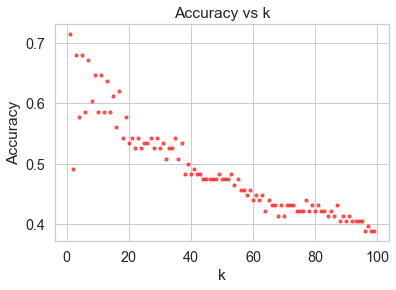

In [62]:
# 시각화.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

☞☞☞☞☞ K 값이 작을 수록 정확도가 높음을 알수 있다!

## 6) Stats이용